In [1]:
import os
import pandas as pd
import numpy as np

os.chdir('/data2/zhouwg_data/project/Garfield')
os.getcwd()

'/data2/zhouwg_data/project/Garfield'

In [2]:
# load packages
import os
import warnings
import Garfield as gf
import scanpy as sc
from mudata import MuData
warnings.simplefilter(action="ignore", category=FutureWarning)
warnings.simplefilter(action='ignore', category=UserWarning)

gf.__version__

'0.3.1'

In [3]:
sc_color=['#7CBB5F','#368650','#A499CC','#5E4D9A','#78C2ED','#866017', '#9F987F','#E0DFED',
 '#EF7B77', '#279AD7','#F0EEF0', '#1F577B', '#A56BA7', '#E0A7C8', '#E069A6', '#941456', '#FCBC10',
 '#EAEFC5', '#01A0A7', '#75C8CC', '#F0D7BC', '#D5B26C', '#D5DA48', '#B6B812', '#9DC3C3', '#A89C92', '#FEE00C', '#FEF2A1']

red_color=['#F0C3C3','#E07370','#CB3E35','#A22E2A','#5A1713','#D3396D','#DBC3DC','#85539B','#5C2B80','#5C4694']
green_color=['#91C79D','#8FC155','#56AB56','#2D5C33','#BBCD91','#6E944A','#A5C953','#3B4A25','#010000']
orange_color=['#EFBD49','#D48F3E','#AC8A3E','#7D7237','#745228','#E1C085','#CEBC49','#EBE3A1','#6C6331','#8C9A48','#D7DE61']
blue_color=['#347862','#6BBBA0','#81C0DD','#3E8CB1','#88C8D2','#52B3AD','#265B58','#B2B0D4','#5860A7','#312C6C']
purple_color=['#823d86','#825b94','#bb98c6','#c69bc6','#a69ac9','#c5a6cc','#caadc4','#d1c3d4']

ditto_color=[
            "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2",
            "#D55E00", "#CC79A7", "#666666", "#AD7700", "#1C91D4",
            "#007756", "#D5C711", "#005685", "#A04700", "#B14380",
            "#4D4D4D", "#FFBE2D", "#80C7EF", "#00F6B3", "#F4EB71",
            "#06A5FF", "#FF8320", "#D99BBD", "#8C8C8C"
        ]

In [4]:
os.chdir('/data2/zhouwg_data/project/Garfield-reproducibility')
os.getcwd()

'/data2/zhouwg_data/project/Garfield-reproducibility'

In [5]:
# Load reference data
# Define paths
st_data_folder_path = "./datasets/inhouse_data/N04-7" # spatially resolved transcriptomics data

dataset = "scRNA_ref_lung" # adata_lung_N04_7
# cell_type_key = "cell_type"

adata = sc.read_h5ad(f"{st_data_folder_path}/{dataset}.h5ad")
adata.var_names_make_unique(join="++")
adata

AnnData object with n_obs × n_vars = 30000 × 38606
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'percent.mt', 'percent.hb', 'barcode', 'sample', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_counts_hb', 'pct_counts_hb', 'total_counts_ribo', 'pct_counts_ribo', 'leiden', 'barcode.1', 'UMAP1', 'UMAP2', 'Sex', 'Age', 'Height', 'Weight', 'BMI', 'Stage', 'FEV1', 'FVC', 'FEV1_FVC_ratio', 'FEV1_preditced', 'FEV1.pred', 'LAA', 'AWT.PI10', 'new_group', 'AECOPD', 'Group', 'Disease', 'cellclass', 'MKI67', 'celltype', 'celltype_num', 'celltype_num_name', 'FEV1%pred', 'AWT-PI10'
    var: 'gene'

In [6]:
adata.layers['counts'] = adata.X.copy()
# adata.X = adata.layers['counts'].copy()
adata.X.max()

22051.0

## Integrating spatial data using Garfield

In [7]:
# set workdir
workdir = 'Garfield_' + dataset
gf.settings.set_workdir(workdir)

### modify parameter
user_config = dict(
    ## Input options
    adata_list=adata,  # STR     adata object of single-cell dataset.         Default is `adata`.
    profile='RNA',   # STR     Type of single-cell dataset.                  Default is `RNA`.
    data_type=None,
    sub_data_type=None,
    sample_col=None,  # STR     Column name of sample in adata.obs.       Default is `batch`.
    weight=0.5,

    ## Preprocessing options
    graph_const_method='mu_std',
    genome=None,
    use_gene_weight=True,
    use_top_pcs=False,
    used_hvg=True,
    min_cells=3,
    min_features=0,
    keep_mt=False,
    target_sum=1e4,
    rna_n_top_features=3000,
    atac_n_top_features=10000,
    n_components=50,
    n_neighbors=5,
    metric='euclidean',  # STR     Metric for clustering.                   Default is `euclidean`.
    svd_solver='arpack',
    # datasets
    adj_key='connectivities', # spatial_connectivities connectivities
    
    # data split parameters
    edge_val_ratio=0.1,
    edge_test_ratio=0.,
    node_val_ratio=0.1,
    node_test_ratio=0.,

    ## Model options
    augment_type='svd',
    svd_q=5,
    use_FCencoder=False,
    conv_type='GATv2Conv', # GAT or GATv2Conv or GCN
    gnn_layer=2,
    hidden_dims=[128, 128],
    bottle_neck_neurons=20,
    cluster_num=20,
    drop_feature_rate=0.2, 
    drop_edge_rate=0.2,
    num_heads=3,
    dropout=0.2,
    concat=True,
    used_edge_weight=False,
    used_DSBN=False,
    used_mmd=False,
    # data loader parameters
    # loader_type='graphsaint', # neighbor graphsaint dataLoader
    num_neighbors=5,
    loaders_n_hops=2,
    edge_batch_size=4096,
    node_batch_size=128, # None
    # loss parameters
    include_edge_recon_loss=True,
    include_gene_expr_recon_loss=True,
    lambda_latent_contrastive_loss=1.0,
    lambda_gene_expr_recon=300.,
    lambda_edge_recon=500.,
    lambda_omics_recon_mmd_loss=0.2,
    # train parameters
    n_epochs_no_edge_recon=0,
    learning_rate=0.001,
    weight_decay=1e-05,
    gradient_clipping=5,
    # other parameters
    latent_key='garfield_latent',
    reload_best_model=True,
    use_early_stopping=True,
    early_stopping_kwargs=None,
    monitor=True,
    seed=2024,
    verbose=True
)
dict_config = gf.settings.set_gf_params(user_config)

Saving results in: Garfield_scRNA_ref_lung


In [8]:
from Garfield.model import Garfield

# Initialize model
model = Garfield(dict_config)

--- DATA LOADING AND PREPROCESSING ---
COSINE SIM GRAPH DECODER -> dropout_rate: 0.2


In [9]:
# Train model
model.train()


--- INITIALIZING TRAINER ---
Number of training nodes: 27000
Number of validation nodes: 3000
Number of training edges: 84384
Number of validation edges: 9376
Edge batch size: 4096
Node batch size: 128

--- MODEL TRAINING ---
Epoch 1/100 |--------------------| 1.0% val_auroc_score: 0.9478; val_auprc_score: 0.9257; val_best_acc_score: 0.9063; val_best_f1_score: 0.9121; train_kl_reg_loss: 7.5112; train_edge_recon_loss: 338.5581; train_gene_expr_recon_loss: 41.1453; train_lambda_latent_contrastive_instanceloss: 7.1510; train_lambda_latent_contrastive_clusterloss: 3.6593; train_global_loss: 398.0249; train_optim_loss: 398.0249; val_kl_reg_loss: 13.2839; val_edge_recon_loss: 276.5350; val_gene_expr_recon_loss: 34.9392; val_lambda_latent_contrastive_instanceloss: 6.7521; val_lambda_latent_contrastive_clusterloss: 3.4575; val_global_loss: 334.9678; val_optim_loss: 334.9678
Epoch 2/100 |--------------------| 2.0% val_auroc_score: 0.9437; val_auprc_score: 0.9170; val_best_acc_score: 0.9056; va

In [10]:
# Compute latent neighbor graph
latent_key = 'garfield_latent'
sc.pp.neighbors(model.adata,
                use_rep=latent_key,
                key_added=latent_key)
# Compute UMAP embedding
sc.tl.umap(model.adata,
           neighbors_key=latent_key)

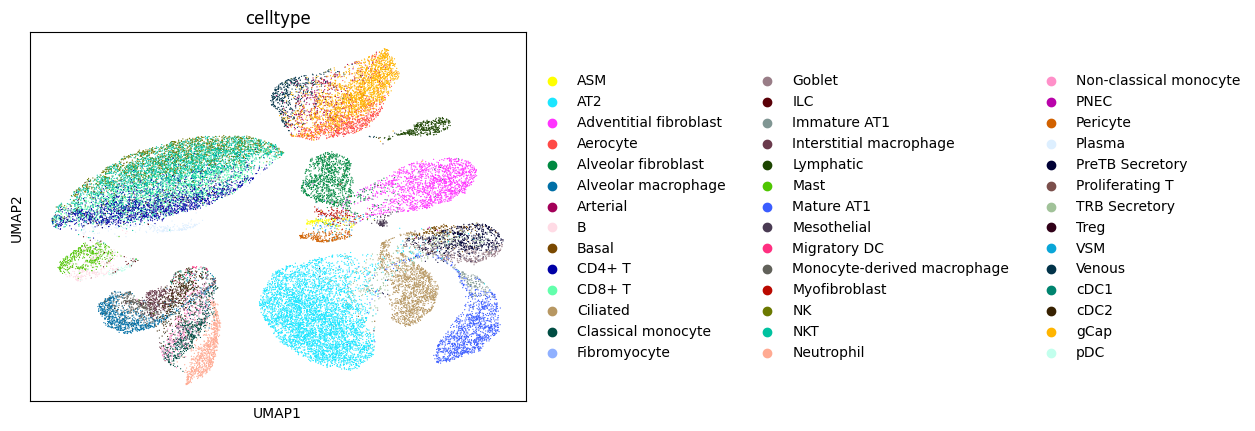

In [12]:
sc.pl.umap(model.adata, color=[ 'celltype'], show=True, size=3) 

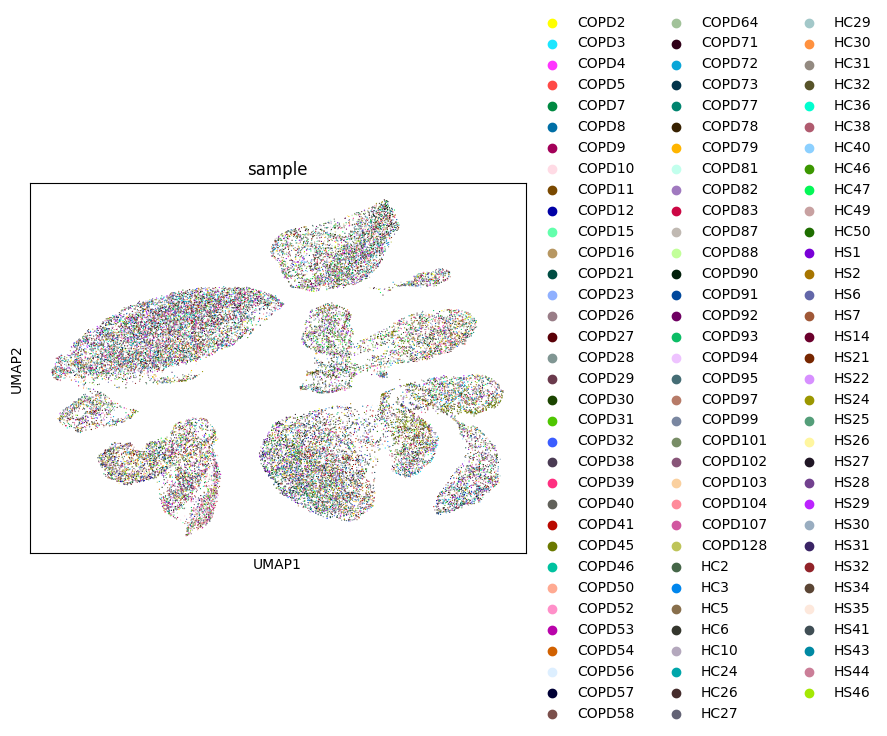

In [15]:
sc.pl.umap(model.adata, color=[ 'sample'], show=True, size=3) 

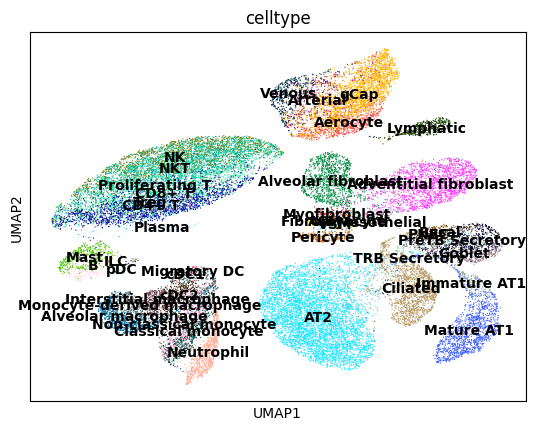

In [13]:
sc.pl.umap(model.adata, color=[ 'celltype'], show=True, size=3, legend_loc='on data') 

In [12]:
# sc.tl.leiden(model.adata, resolution=0.5)

In [13]:
# len(model.adata.obs['leiden'].unique())

13

In [14]:
# Save trained model
model_folder_path = f"{workdir}/model"
os.makedirs(model_folder_path, exist_ok=True)

model.save(dir_path=model_folder_path,
           overwrite=True,
           save_adata=True,
           adata_file_name="adata_ref.h5ad")

In [9]:
## load query adata
dataset = "adata_lung_N04_7" # 
# cell_type_key = "cell_type"

query_adata = sc.read_h5ad(f"{st_data_folder_path}/{dataset}.h5ad")
query_adata.var_names_make_unique(join="++")
query_adata

AnnData object with n_obs × n_vars = 9002 × 38606
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mt'
    var: 'gene'
    obsm: 'spatial'

In [10]:
model_folder_path = f"{workdir}/model"

Query data contains expression data of  35606  genes that were not contained in the reference dataset. This information will be removed from the query data object for further processing.
AnnData object with n_obs × n_vars = 9002 × 3000
    obs: 'orig.ident', 'nCount_Spatial', 'nFeature_Spatial', 'percent.mt'
    var: 'gene'
    obsm: 'spatial'
--- DATA LOADING AND PREPROCESSING ---
COSINE SIM GRAPH DECODER -> dropout_rate: 0.2

--- INITIALIZING TRAINER ---
Number of training nodes: 35102
Number of validation nodes: 3900
Number of training edges: 111253
Number of validation edges: 12361
Edge batch size: 4096
Node batch size: 128

--- MODEL TRAINING ---
Epoch 1/100 |--------------------| 1.0% val_auroc_score: 0.9641; val_auprc_score: 0.9496; val_best_acc_score: 0.9169; val_best_f1_score: 0.9213; train_kl_reg_loss: 29.5865; train_edge_recon_loss: 298.7025; train_gene_expr_recon_loss: 144.5697; train_lambda_latent_contrastive_instanceloss: 6.4564; train_lambda_latent_contrastive_clusterlos

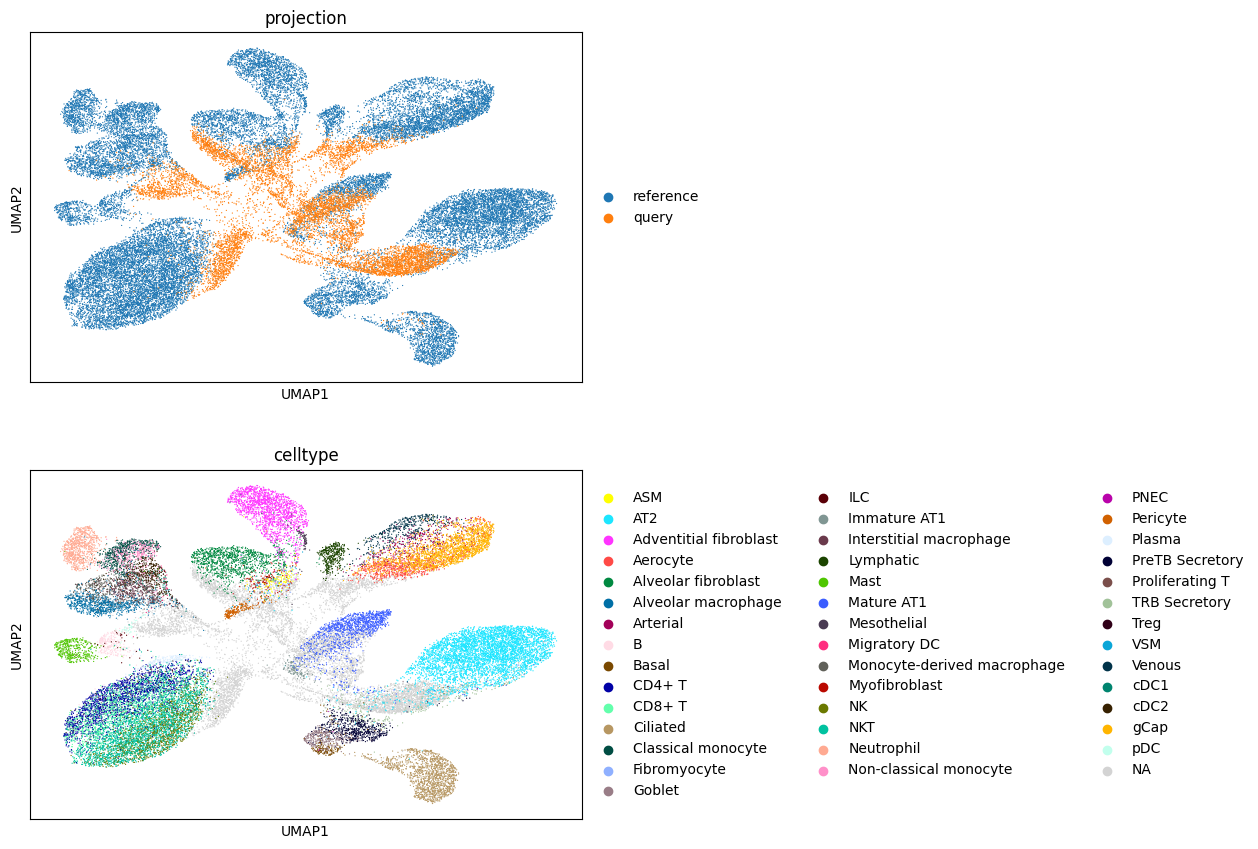

In [11]:
new_model = model.load_query_data(dir_path=model_folder_path,
                                      query_adata=query_adata,
                                      ref_adata_name="adata_ref.h5ad",
                                      use_cuda=True,
                                      unfreeze_all_weights=False,
                                      unfreeze_eps_weight=True,
                                      unfreeze_layer0=True,
                                      used_mmd=True)
# Training and obtain latent representation
new_model.train()

# plot UMAP
sc.pp.neighbors(new_model.adata, use_rep='garfield_latent')
sc.tl.umap(new_model.adata)
sc.pl.umap(new_model.adata, color=['projection', 'celltype'],
           ncols=1, wspace=0.20, edges=False)

## split
adata_ref = new_model.adata[new_model.adata.obs['projection'] == 'reference', :]
adata_query = new_model.adata[new_model.adata.obs['projection'] == 'query', :]
spatial_tmp = query_adata.obsm['spatial'].copy()

In [16]:
### Label transfer
## major celltype
adata_query = new_model.label_transfer(ref_adata=adata_ref,
                                       ref_adata_emb='garfield_latent',
                                       query_adata=adata_query,
                                       query_adata_emb='garfield_latent',
                                       n_neighbors=10,
                                       ref_adata_obs=adata_ref.obs,
                                       label_keys='celltype')

Weighted KNN with n_neighbors = 10 ... 
Label transfer finished!


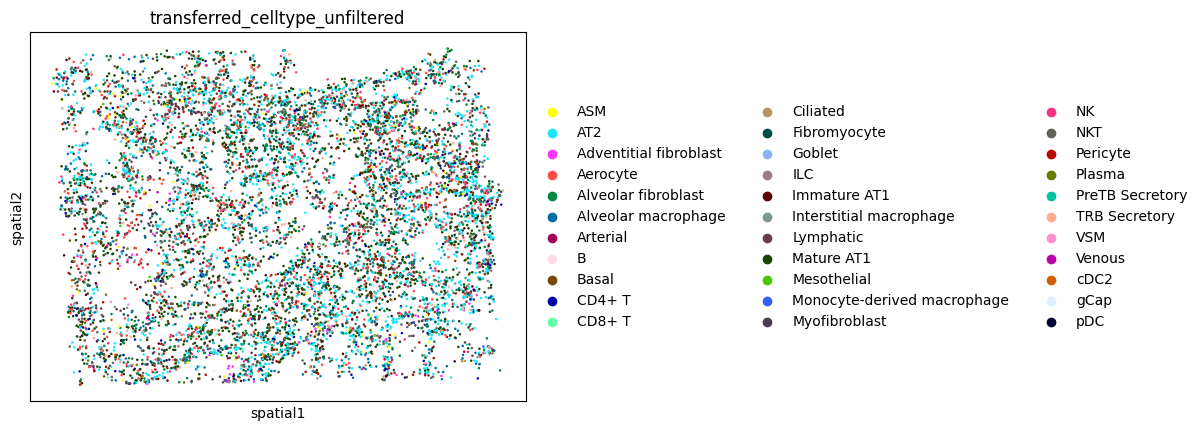

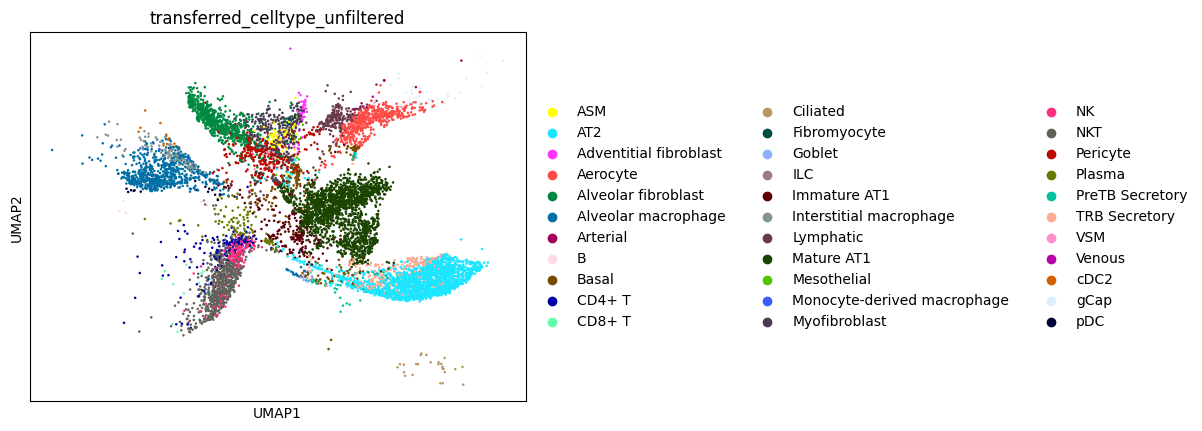

In [18]:
adata_query.obsm['spatial'] = spatial_tmp
sc.pl.embedding(adata_query, basis="spatial",
                color="transferred_celltype_unfiltered")

sc.pl.umap(adata_query, color=['transferred_celltype_unfiltered'],
           ncols=1, wspace=0.20, edges=False)

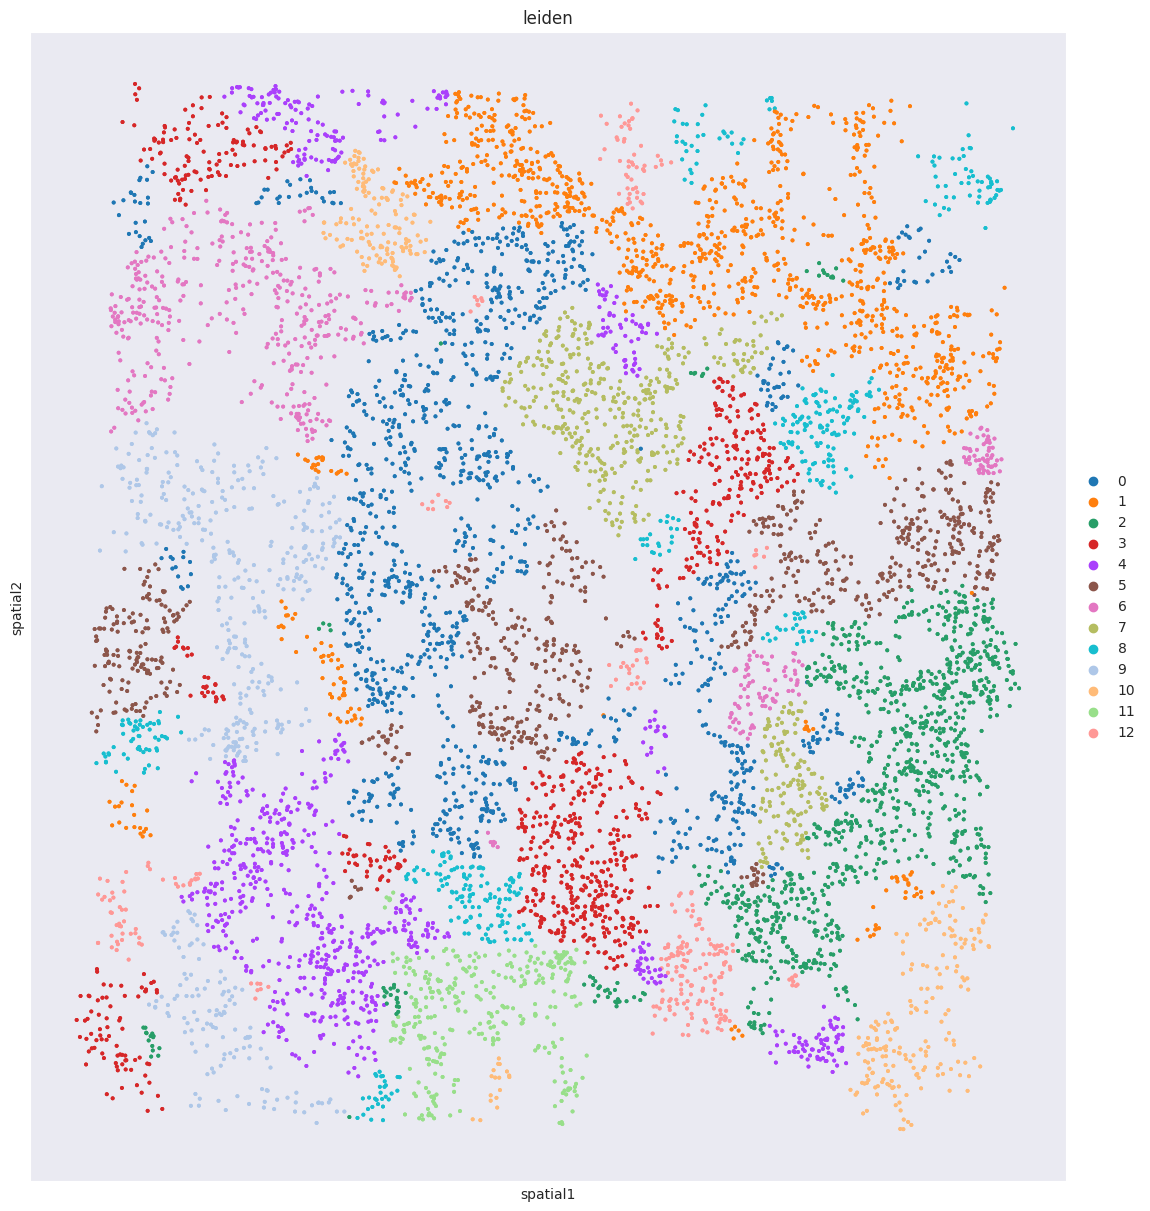

In [14]:
### 分样本展示空间位置
import squidpy as sq

# Visualize cell-level annotated data in physical space
# sq.pl.spatial_scatter(model.adata, color='cell_type', shape=None, figsize=(12, 12))    
sq.pl.spatial_scatter(model.adata, color='leiden', shape=None, figsize=(12, 12))     

In [16]:
figure_folder_path = "./slideseqv2_mouse_hippocampus/figures"
model_folder_path = "./slideseqv2_mouse_hippocampus/model"

os.makedirs(figure_folder_path, exist_ok=True)

In [17]:
# Save trained model
model.save(dir_path=model_folder_path,
           overwrite=True,
           save_adata=True,
           adata_file_name="adata.h5ad")